# Feature Engineering

In [1]:
import pandas as pd
import requests 
import json
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def get_data(download=False):
    if download:
        response=requests.get('https://opendata.ecdc.europa.eu/covid19/casedistribution/json/')
    if download and response.status_code==200:
        s=json.loads(response.text,encoding='utf-8',strict=False)
        data=pd.DataFrame(s['records'])
        data.to_csv('covid_data.csv')
    else:
        data=pd.read_csv('covid_data.csv')
    return data

data=get_data(True)

In [2]:
data['dateRep']=pd.to_datetime(data['dateRep'],dayfirst=True)
data['countriesAndTerritories'] = data['countriesAndTerritories'].astype('category')
data['geoId'] = data['geoId'].astype('category')
data['countryterritoryCode'] = data['countryterritoryCode'].astype('category')
data['continentExp'] = data['continentExp'].astype('category')
data.drop(['day','month','year'],axis=1,inplace=True)

In [3]:
latin_america=data.loc[data['continentExp']=='America']

In [4]:
latin_america.dtypes

dateRep                                                       datetime64[ns]
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                             category
geoId                                                               category
countryterritoryCode                                                category
popData2019                                                          float64
continentExp                                                        category
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000            object
dtype: object

In [7]:
grouped_df=latin_america.groupby(['countriesAndTerritories','dateRep'],observed=True,sort=['dateRep'])['cases'].mean().dropna()

In [8]:
grouped_df.index

MultiIndex([( 'Anguilla', '2020-03-27'),
            ( 'Anguilla', '2020-03-28'),
            ( 'Anguilla', '2020-03-29'),
            ( 'Anguilla', '2020-03-30'),
            ( 'Anguilla', '2020-03-31'),
            ( 'Anguilla', '2020-04-01'),
            ( 'Anguilla', '2020-04-02'),
            ( 'Anguilla', '2020-04-03'),
            ( 'Anguilla', '2020-04-04'),
            ( 'Anguilla', '2020-04-05'),
            ...
            ('Venezuela', '2020-07-02'),
            ('Venezuela', '2020-07-03'),
            ('Venezuela', '2020-07-04'),
            ('Venezuela', '2020-07-05'),
            ('Venezuela', '2020-07-06'),
            ('Venezuela', '2020-07-07'),
            ('Venezuela', '2020-07-08'),
            ('Venezuela', '2020-07-09'),
            ('Venezuela', '2020-07-10'),
            ('Venezuela', '2020-07-11')],
           names=['countriesAndTerritories', 'dateRep'], length=6090)

In [9]:
grouped_df['Chile'].describe()

count      129.000000
mean      2397.472868
std       3627.339409
min          1.000000
25%        312.000000
50%       1373.000000
75%       3964.000000
max      36179.000000
Name: cases, dtype: float64

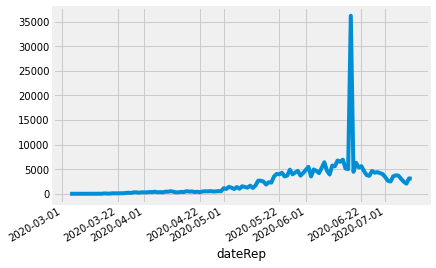

In [10]:
grouped_df['Chile'].plot()

In [11]:
removed_outliers = grouped_df['Chile'].between(0, grouped_df['Chile'].quantile(.95))

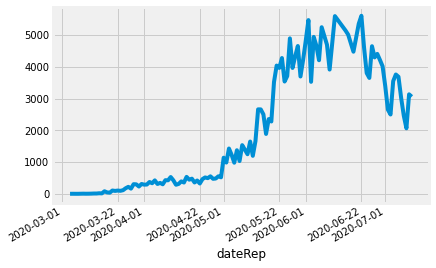

In [13]:
grouped_df['Chile'][removed_outliers].plot()

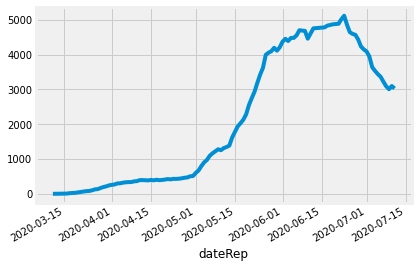

In [14]:
grouped_df['Chile'][removed_outliers].rolling(7).mean().plot()

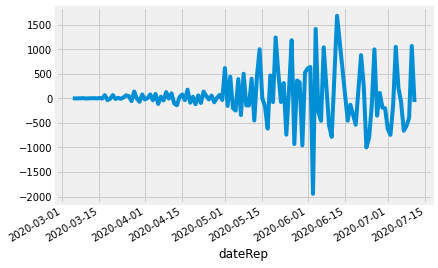

In [15]:
grouped_df['Chile'][removed_outliers].diff().plot()

In [16]:
num_days=(grouped_df['Chile'].index.max()-grouped_df['Chile'].index.min()).days
print('Numero total de dias: {0}'.format(num_days))

Numero total de dias: 129


In [17]:
num_cases=(grouped_df['Chile'][removed_outliers].max()-grouped_df['Chile'][removed_outliers][-1])
print('Diferencia de casos: {0}'.format(num_cases))

Diferencia de casos: 2549


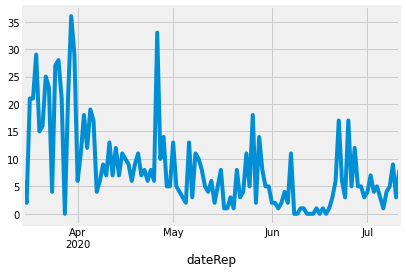

In [18]:
grouped_df['Uruguay'].plot()

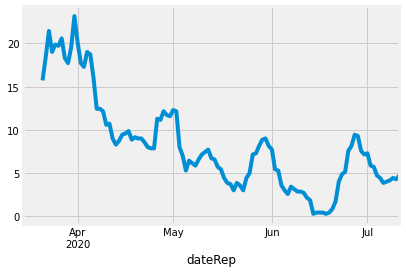

In [19]:
grouped_df['Uruguay'].rolling(7).mean().plot()

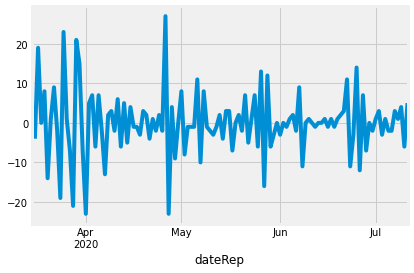

In [20]:
grouped_df['Uruguay'].diff().plot()

In [21]:
num_days=(grouped_df['Uruguay'].index.max()-grouped_df['Uruguay'].index.min()).days
print('Numero total de dias: {0}'.format(num_days))

Numero total de dias: 118


In [22]:
num_cases=(grouped_df['Uruguay'].max()-grouped_df['Uruguay'][-1])
print('Diferencia de casos: {0}'.format(num_cases))

Diferencia de casos: 28


In [23]:
num_cases=(grouped_df['Bolivia'].max()-grouped_df['Bolivia'][-1])
print('Diferencia de casos: {0}'.format(num_cases))

Diferencia de casos: 0


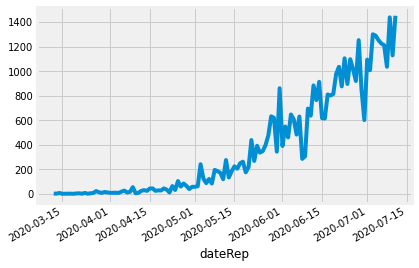

In [24]:
grouped_df['Bolivia'].plot()

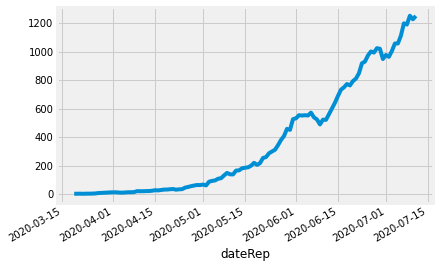

In [25]:
grouped_df['Bolivia'].rolling(7).mean().plot()

In [ ]:
num_cases=(grouped_df['Bolivia'].max()-grouped_df['Bolivia'][-1])
print('Diferencia de casos: {0}'.format(num_cases))

In [ ]:
num_cases=(grouped_df['United_States_of_America'].max()-grouped_df['United_States_of_America'][-1])
print('Diferencia de casos: {0}'.format(num_cases))

Diferencia de casos: 0


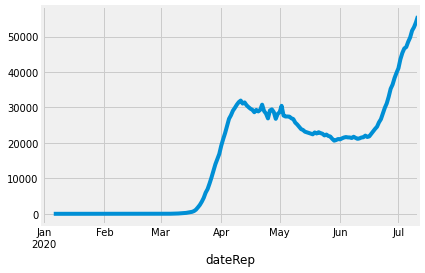

In [27]:
grouped_df['United_States_of_America'].rolling(7).mean().plot()

In [ ]:
grouped_df['United_States_of_America'].plot()

In [ ]:
latin_america['countriesAndTerritories'].unique()

[Anguilla, Antigua_and_Barbuda, Argentina, Aruba, Bahamas, ..., Turks_and_Caicos_islands, United_States_of_America, United_States_Virgin_Islands, Uruguay, Venezuela]
Length: 49
Categories (49, object): [Anguilla, Antigua_and_Barbuda, Argentina, Aruba, ..., United_States_of_America, United_States_Virgin_Islands, Uruguay, Venezuela]

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo base para predecir la variable 'nuevos casos por millon de habitantes' usando las tasas de movilidad.
2.   Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo usando feature engineering.


In [29]:
# Analisis Exploratorio de Casos COVID 
if download:
        data=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
        data.to_csv('covid_owid_data.csv')
    else:
        data=pd.read_csv('covid_owid_data.csv')
    return data

data=get_owid_data(True)

In [32]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [33]:
data.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

In [35]:
data['date']=pd.to_datetime(data['date'],format='%Y/%m/%d')
data['location'] = data['location'].astype('category')
data['continent'] = data['continent'].astype('category')
data['iso_code'] = data['iso_code'].astype('category')

In [36]:
grouped_df=data.groupby(['location','date'],observed=True,sort=['date']).mean()

In [37]:
removed_outliers = grouped_df['new_cases_per_million']['Chile'].between(0, grouped_df['new_cases_per_million']['Chile'].quantile(.95))

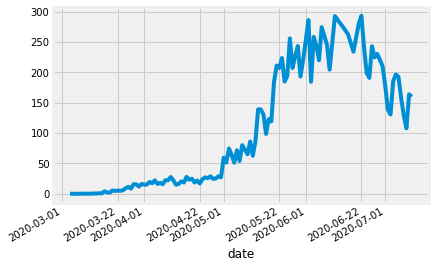

In [40]:
grouped_df['new_cases_per_million']['Chile'][removed_outliers].plot()

In [ ]:
! tar -zxvf mobility_data.tar.gz

mobility_data.csv


In [31]:
def get_mobility_data(download=False):
    if download:
        data=pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=5a11e4fc1b8138c6')
        data.to_csv('mobility_data.csv')
    else:
        data=pd.read_csv('mobility_data.csv', low_memory=False)
    return data

mobility_report=get_mobility_data(True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [41]:
mobility_report.dtypes

country_region_code                                    object
country_region                                         object
sub_region_1                                           object
sub_region_2                                           object
iso_3166_2_code                                        object
census_fips_code                                      float64
date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [43]:
mobility_report['date']=pd.to_datetime(mobility_report['date'],format='%Y/%m/%d')
mobility_report['country_region_code'] = mobility_report['country_region_code'].astype('category')
mobility_report['country_region'] = mobility_report['country_region'].astype('category')
mobility_report['iso_3166_2_code'] = mobility_report['iso_3166_2_code'].astype('category')
mobility_report.drop(['sub_region_1','sub_region_2','census_fips_code','iso_3166_2_code'],axis=1,inplace=True)

In [44]:
mobility_chile=mobility_report.loc[mobility_report.country_region=='Chile'].copy()
mobility_chile.set_index('date',inplace=True)
mobility_chile.sort_index(inplace=True)

In [46]:
mobility_chile.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2332.000000
mean,-47.461601,-30.644199,-51.498366,-48.226716,-27.452614,17.208834
std,26.939339,21.633734,26.144579,27.525395,21.244509,9.623217
min,-91.000000,-85.000000,-90.000000,-94.000000,-83.000000,-3.000000
25%,-65.000000,-45.000000,-68.000000,-66.000000,-41.000000,14.000000
50%,-56.000000,-36.000000,-60.000000,-57.000000,-30.000000,20.000000
75%,-44.000000,-21.750000,-47.000000,-42.000000,-17.000000,23.000000
max,51.000000,31.000000,58.000000,26.000000,25.000000,42.000000


In [47]:
casos_chile=grouped_df['new_cases_per_million']['Chile'][removed_outliers]

In [48]:
df_chile=pd.merge(casos_chile,mobility_chile, left_index=True, right_index=True)

In [49]:
df_chile.dtypes

new_cases_per_million                                  float64
country_region_code                                   category
country_region                                        category
retail_and_recreation_percent_change_from_baseline     float64
grocery_and_pharmacy_percent_change_from_baseline      float64
parks_percent_change_from_baseline                     float64
transit_stations_percent_change_from_baseline          float64
workplaces_percent_change_from_baseline                float64
residential_percent_change_from_baseline               float64
dtype: object

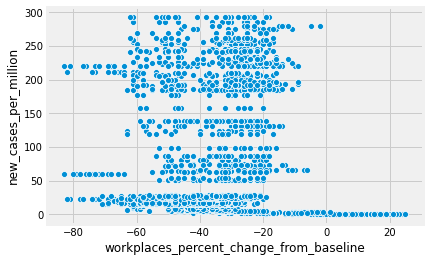

In [51]:
import seaborn as sns

sns.scatterplot(x="workplaces_percent_change_from_baseline", y="new_cases_per_million", data=df_chile)


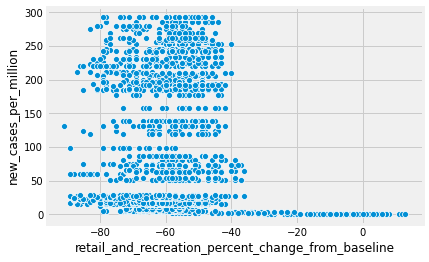

In [52]:
sns.scatterplot(x="retail_and_recreation_percent_change_from_baseline", y="new_cases_per_million", data=df_chile)


In [53]:
df_chile.drop(['country_region_code','country_region'],axis=1,inplace=True)

In [54]:
df_chile.head()

,new_cases_per_million,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,
2020-03-04,0.052,11.0,13.0,-30.0,-7.0,12.0,1.0
2020-03-04,0.052,7.0,3.0,-22.0,-2.0,12.0,2.0
2020-03-04,0.052,4.0,1.0,-15.0,-16.0,-9.0,1.0
2020-03-04,0.052,2.0,6.0,-19.0,-2.0,15.0,0.0
2020-03-04,0.052,-4.0,9.0,-5.0,-6.0,17.0,0.0


In [55]:
df_chile['new_cases_per_million'].isna().sum()

0

In [56]:
df_chile[df_chile.columns.difference(['new_cases_per_million'])].isna().sum()

grocery_and_pharmacy_percent_change_from_baseline      0
parks_percent_change_from_baseline                     0
residential_percent_change_from_baseline              99
retail_and_recreation_percent_change_from_baseline     0
transit_stations_percent_change_from_baseline          0
workplaces_percent_change_from_baseline                0
dtype: int64

In [57]:
df_chile['residential_percent_change_from_baseline'].fillna(method='ffill',inplace=True)

In [108]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

y=df_chile['new_cases_per_million'].values
X=df_chile[df_chile.columns.difference(['new_cases_per_million'])].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression(normalize=False,fit_intercept=True).fit(X_train, y_train)
y_hat=reg.predict(X_test)
print('Coeficiente de Determinacion R2 Modelo Base: {0:0.2f}'.format(reg.score(X_test,y_test)))
print('MAE Modelo Base: {0:0.2f}'.format(mean_absolute_error(y_test,y_hat)))
print('% Varianza Explicada  Modelo Base: {0:0.2f}'.format(explained_variance_score(y_test,y_hat)))

Coeficiente de Determinacion R2 Modelo Base: 0.31
MAE Modelo Base: 68.46
% Varianza Explicada  Modelo Base: 0.31


In [109]:
from sklearn.preprocessing import PolynomialFeatures

def train_poly(X,y,p=8,interaction=True):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  for k in range(2,p):
    poly = PolynomialFeatures(k,interaction_only=interaction)
    poly.fit(X_train)
    X_train_p2=poly.transform(X_train)
    X_test_p2=poly.transform(X_test)

    reg_p2 = LinearRegression(normalize=False,fit_intercept=True).fit(X_train_p2, y_train)
    y_hat_p2=reg_p2.predict(X_test_p2)
    print('Coeficiente de Determinacion R2 Polinomio ({0}) : {1:0.2f}'.format(k,reg_p2.score(X_test_p2,y_test)))
    print('MAE Polinomio ({0}) : {1:0.2f}'.format(k,mean_absolute_error(y_test,y_hat_p2)))
    print('% Varianza Explicada  Polinomio ({0}) : {1:0.2f}'.format(k,explained_variance_score(y_test,y_hat_p2)))
    print('-----------------------------------------------------')

train_poly(X,y,p=5,interaction=False)

Coeficiente de Determinacion R2 Polinomio (2) : 0.44
MAE Polinomio (2) : 60.13
% Varianza Explicada  Polinomio (2) : 0.44
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (3) : 0.46
MAE Polinomio (3) : 56.37
% Varianza Explicada  Polinomio (3) : 0.46
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (4) : 0.41
MAE Polinomio (4) : 58.59
% Varianza Explicada  Polinomio (4) : 0.41
-----------------------------------------------------


In [111]:
train_poly(X,y,p=6,interaction=True)

Coeficiente de Determinacion R2 Polinomio (2) : 0.43
MAE Polinomio (2) : 61.06
% Varianza Explicada  Polinomio (2) : 0.43
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (3) : 0.45
MAE Polinomio (3) : 59.09
% Varianza Explicada  Polinomio (3) : 0.45
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (4) : 0.46
MAE Polinomio (4) : 57.98
% Varianza Explicada  Polinomio (4) : 0.46
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (5) : 0.46
MAE Polinomio (5) : 57.93
% Varianza Explicada  Polinomio (5) : 0.46
-----------------------------------------------------


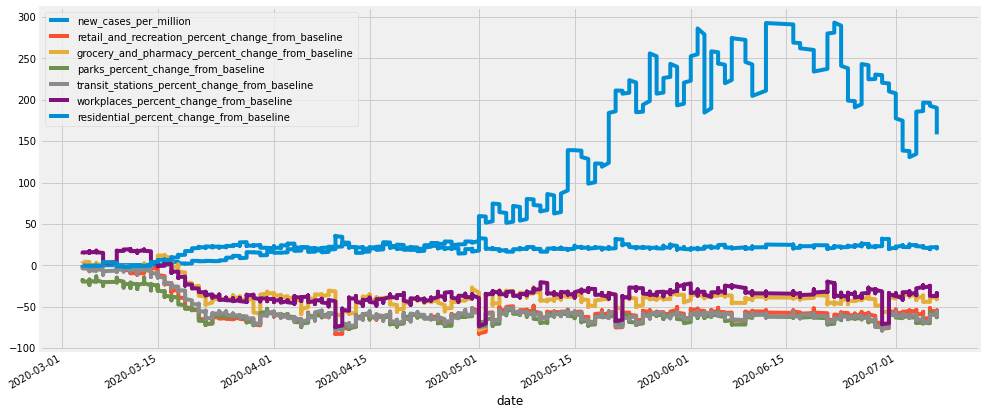

In [112]:
df_chile.rolling(14).mean().plot(figsize=(15,7))

In [113]:
y=df_chile['new_cases_per_million'].rolling(14).mean().dropna().values
X=df_chile[df_chile.columns.difference(['new_cases_per_million'])].rolling(14).mean().dropna().values


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression(normalize=False,fit_intercept=True).fit(X_train, y_train)
y_hat=reg.predict(X_test)
print('Coeficiente de Determinacion R2 Modelo Base: {0:0.2f}'.format(reg.score(X_test,y_test)))
print('MAE Modelo Base: {0:0.2f}'.format(mean_absolute_error(y_test,y_hat)))
print('% Varianza Explicada  Modelo Base: {0:0.2f}'.format(explained_variance_score(y_test,y_hat)))

Coeficiente de Determinacion R2 Modelo Base: 0.59
MAE Modelo Base: 51.13
% Varianza Explicada  Modelo Base: 0.59


In [115]:
train_poly(X,y,p=6,interaction=True)

Coeficiente de Determinacion R2 Polinomio (2) : 0.73
MAE Polinomio (2) : 40.00
% Varianza Explicada  Polinomio (2) : 0.73
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (3) : 0.76
MAE Polinomio (3) : 36.90
% Varianza Explicada  Polinomio (3) : 0.76
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (4) : 0.78
MAE Polinomio (4) : 34.37
% Varianza Explicada  Polinomio (4) : 0.78
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (5) : 0.78
MAE Polinomio (5) : 33.90
% Varianza Explicada  Polinomio (5) : 0.78
-----------------------------------------------------


In [116]:
casos_bolivia=grouped_df['new_cases_per_million']['Bolivia']

In [136]:
casos_bolivia.isna().sum()

1

In [118]:
mobility_bolivia=mobility_report.loc[mobility_report.country_region=='Bolivia'].copy()
mobility_bolivia.set_index('date',inplace=True)
mobility_bolivia.sort_index(inplace=True)

In [119]:
mobility_bolivia.isna().sum()

country_region_code                                     0
country_region                                          0
retail_and_recreation_percent_change_from_baseline      2
grocery_and_pharmacy_percent_change_from_baseline      30
parks_percent_change_from_baseline                      0
transit_stations_percent_change_from_baseline         144
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline              277
dtype: int64

In [138]:
df_bolivia=pd.merge(casos_bolivia,mobility_bolivia, left_index=True, right_index=True)

In [135]:
df_bolivia.describe()

,new_cases_per_million,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,1170.000000,1178.000000,1154.000000,1180.000000,1062.000000,1180.000000,929.000000
mean,29.660735,-69.824278,-58.863085,-62.904237,-74.382298,-53.188983,29.207750
std,33.697647,19.234824,25.485611,20.382104,17.933188,20.310375,8.717854
min,0.000000,-96.000000,-97.000000,-93.000000,-95.000000,-89.000000,-3.000000
25%,2.056000,-85.000000,-77.750000,-78.000000,-86.000000,-69.000000,25.000000
50%,14.992000,-75.000000,-63.000000,-67.000000,-79.000000,-56.000000,30.000000
75%,53.028000,-59.000000,-44.000000,-51.000000,-69.000000,-41.000000,35.000000
max,111.454000,6.000000,16.000000,16.000000,1.000000,27.000000,51.000000


In [162]:
df_bolivia.fillna(method='ffill',inplace=True)

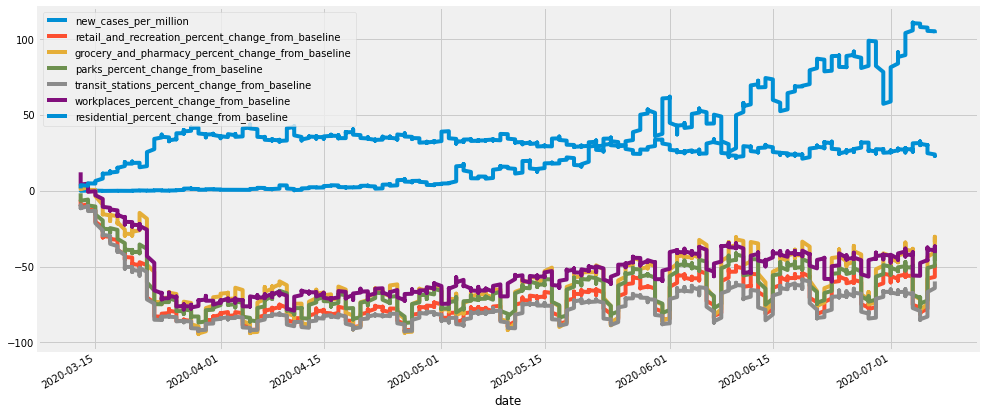

In [163]:
df_bolivia.rolling(14).mean().plot(figsize=(15,7))

In [164]:
df_bolivia.isna().sum()

new_cases_per_million                                 0
country_region_code                                   0
country_region                                        0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         1
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64

In [165]:
df_bolivia.fillna(method='bfill',inplace=True)

In [166]:
df_bolivia.isna().sum()

new_cases_per_million                                 0
country_region_code                                   0
country_region                                        0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64

In [175]:
window=20
y=df_bolivia['new_cases_per_million'].rolling(window).mean().dropna().values
X=df_bolivia[df_bolivia.columns.difference(['new_cases_per_million'])].rolling(window).mean().dropna().values


In [177]:
train_poly(X,y,p=8,interaction=True)

Coeficiente de Determinacion R2 Polinomio (2) : 0.81
MAE Polinomio (2) : 10.24
% Varianza Explicada  Polinomio (2) : 0.81
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (3) : 0.81
MAE Polinomio (3) : 9.39
% Varianza Explicada  Polinomio (3) : 0.82
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (4) : 0.78
MAE Polinomio (4) : 9.85
% Varianza Explicada  Polinomio (4) : 0.79
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (5) : 0.82
MAE Polinomio (5) : 8.88
% Varianza Explicada  Polinomio (5) : 0.82
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (6) : 0.78
MAE Polinomio (6) : 10.13
% Varianza Explicada  Polinomio (6) : 0.79
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (7) : 0.78
MAE Polinomio (7) : 10.13
% Varianza Explicada  Polinomio (7) : 0.79
-